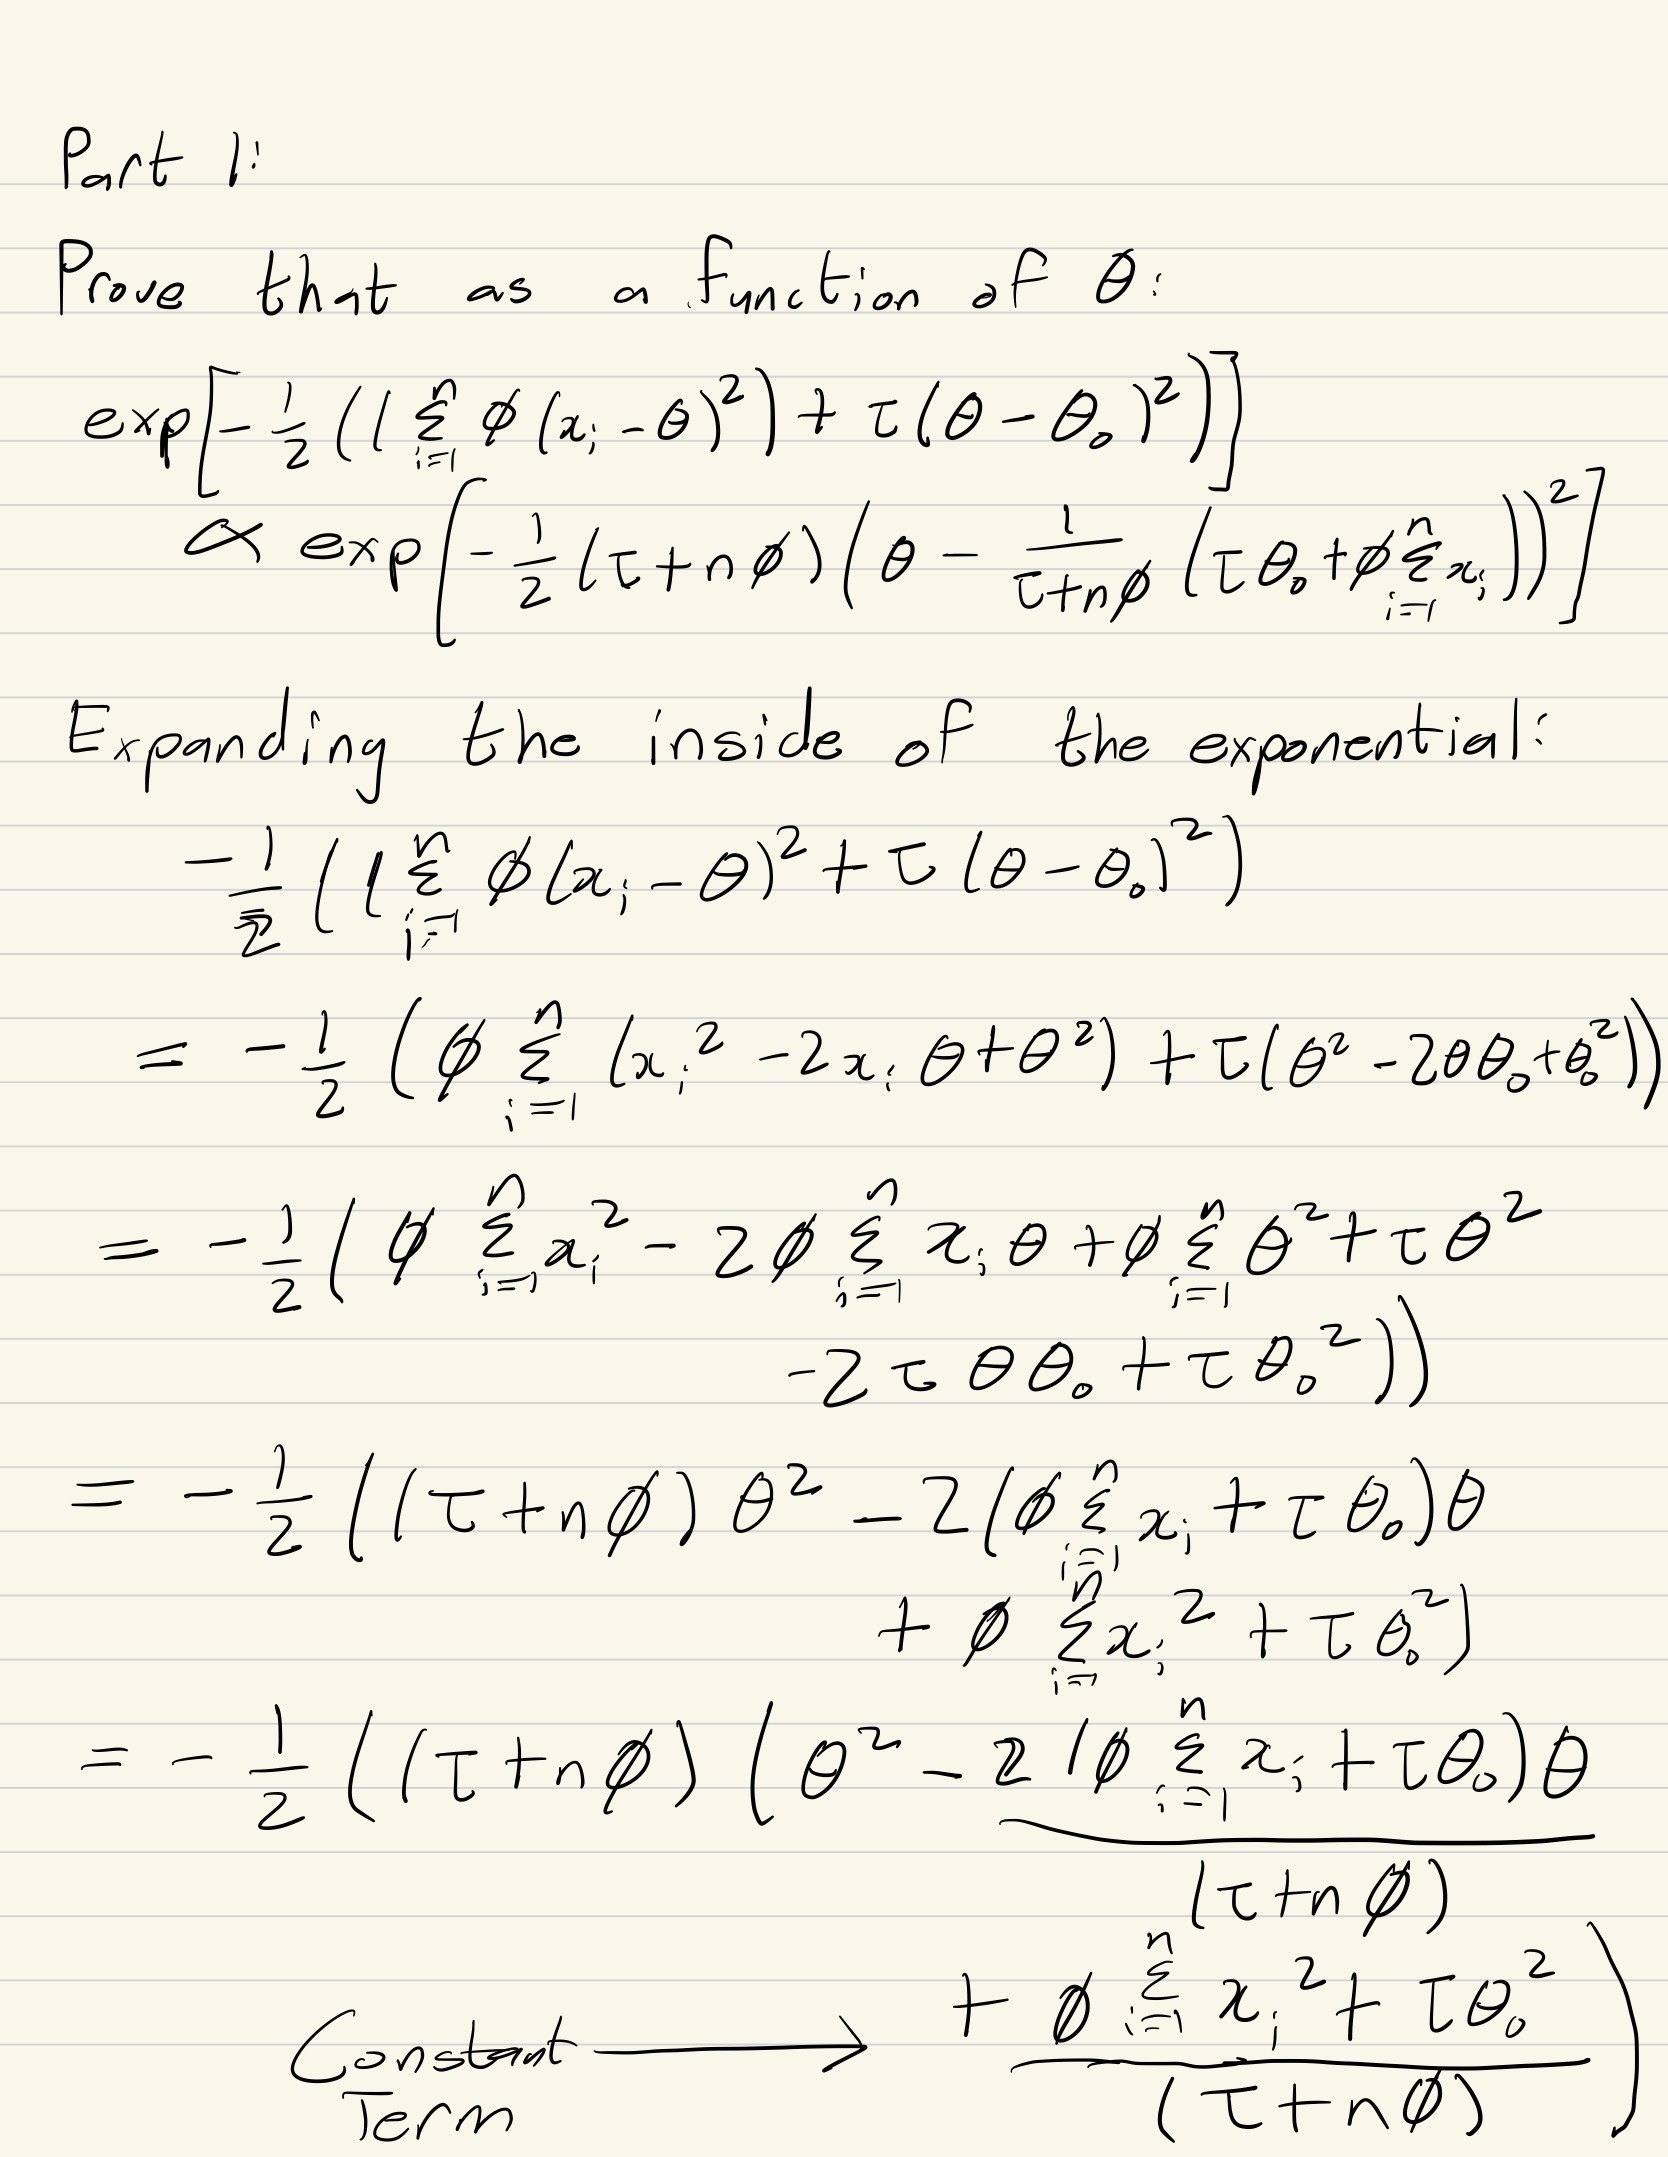

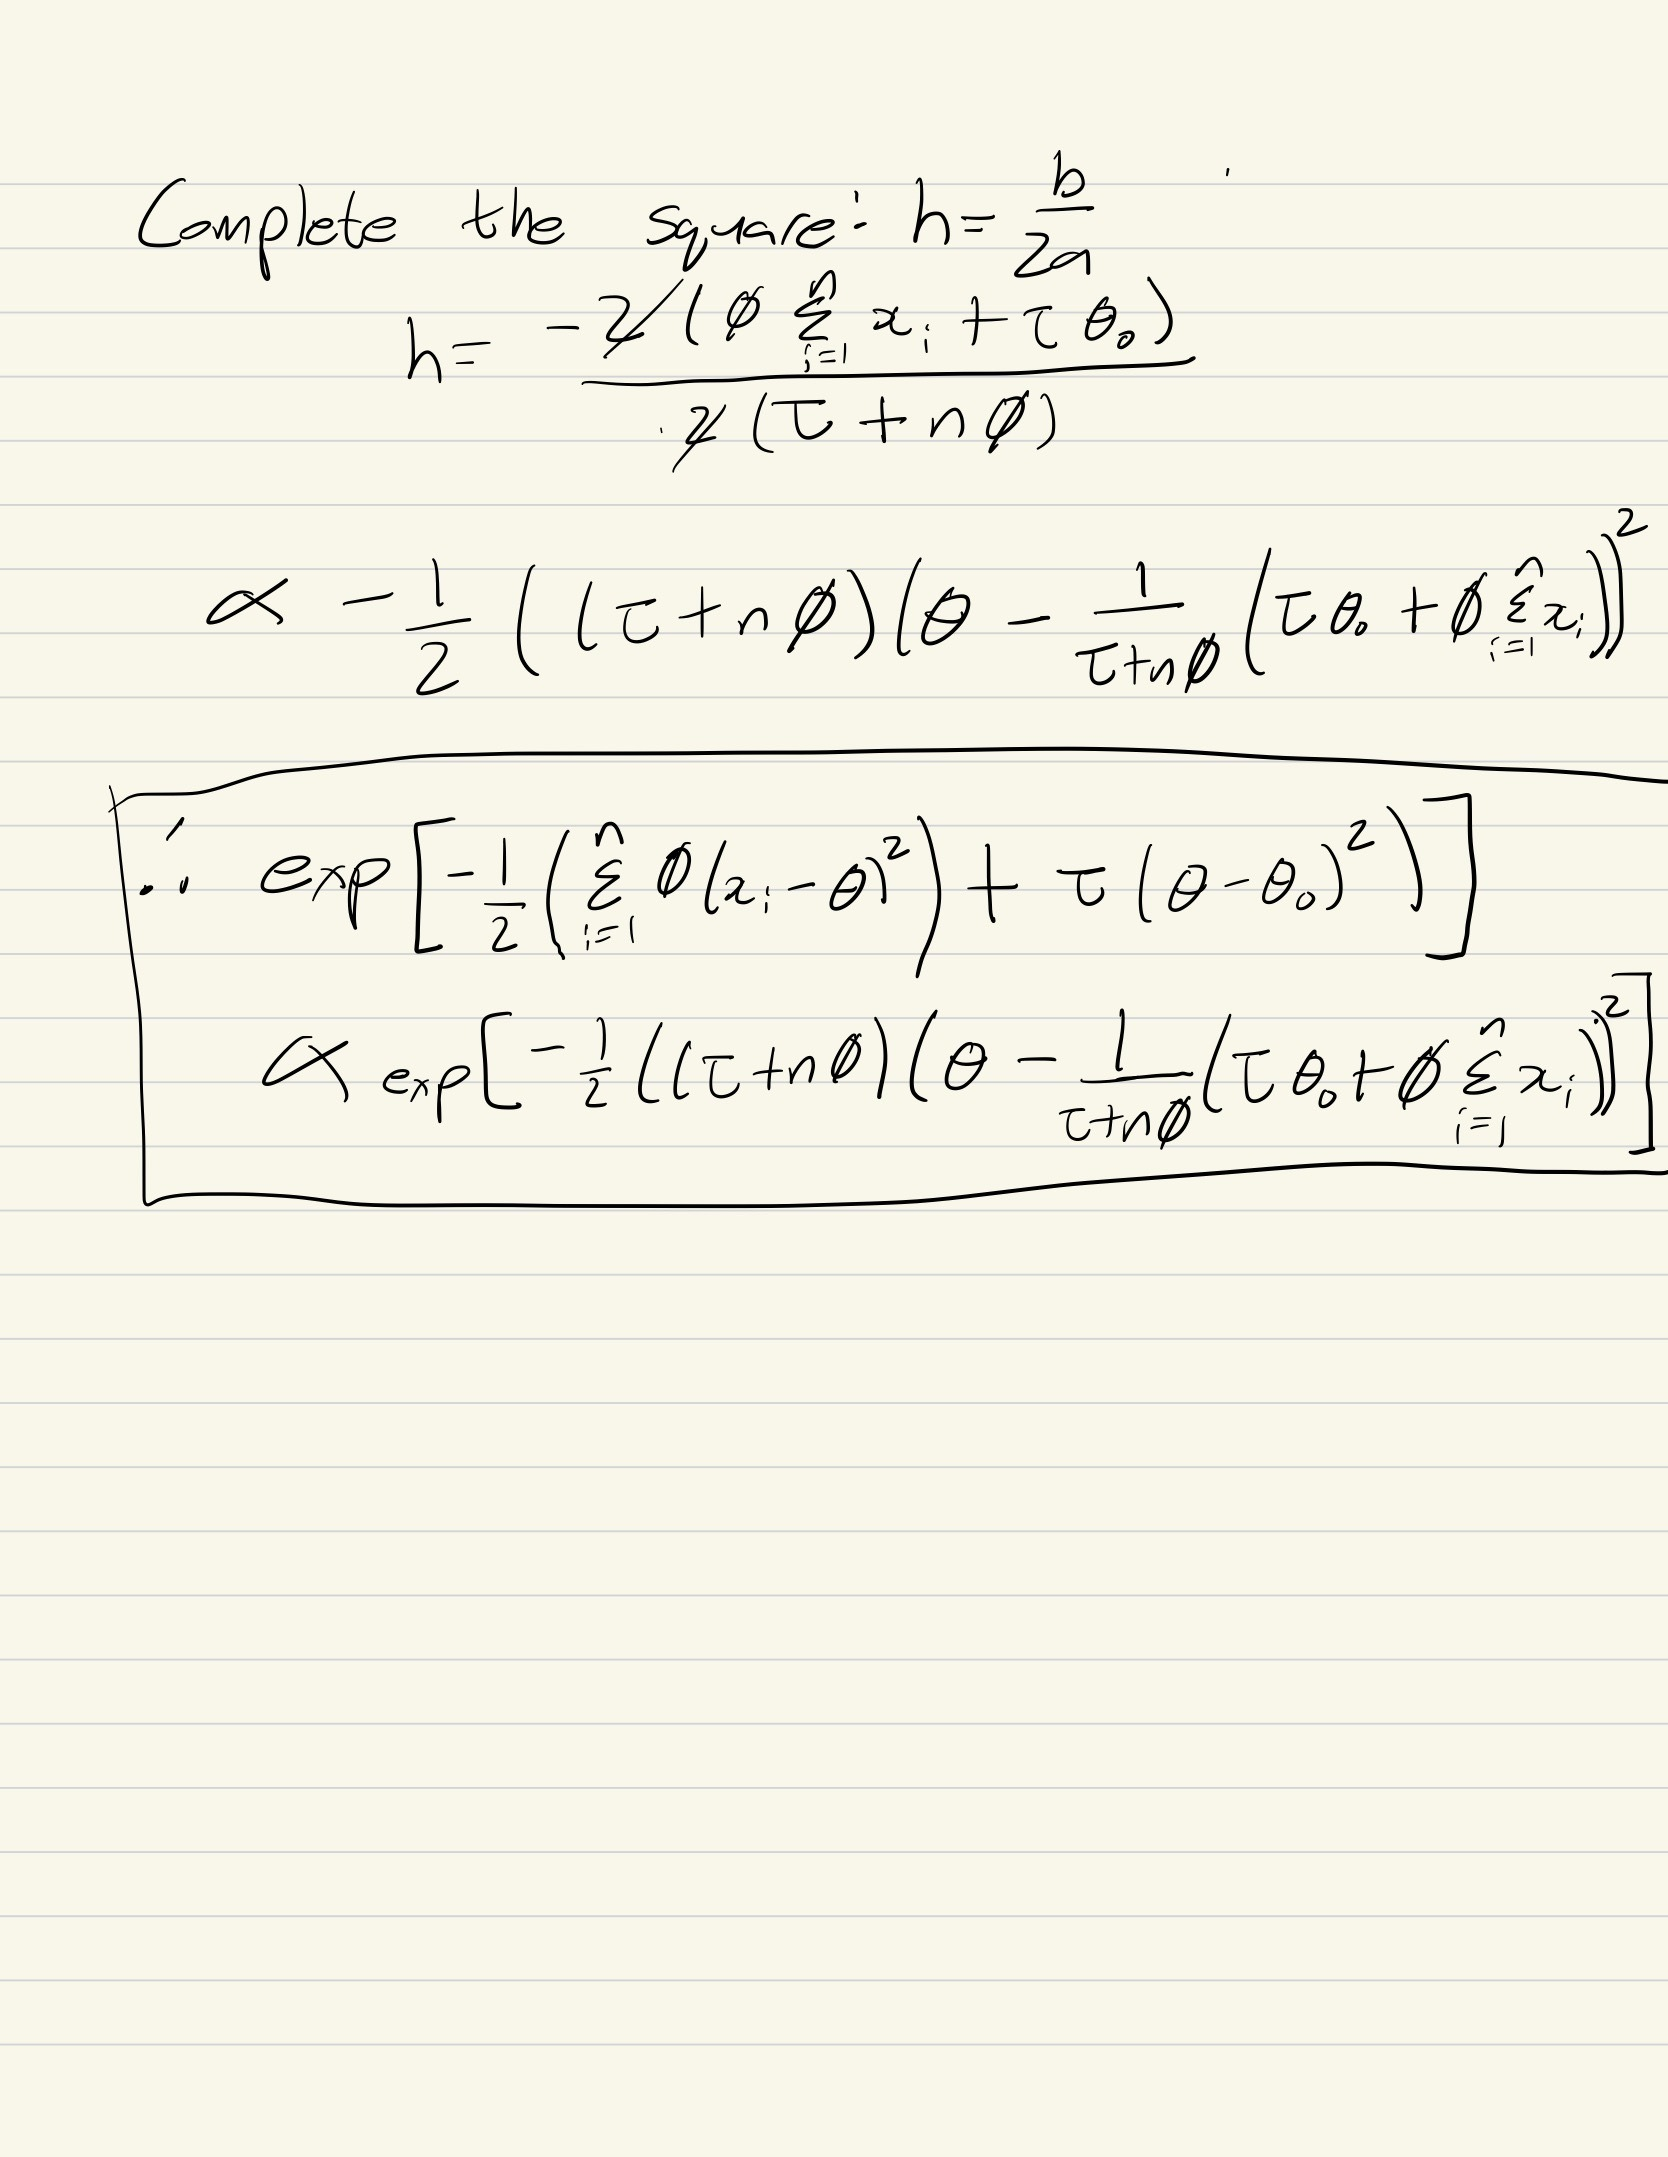

In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

Classic Bayes Figure

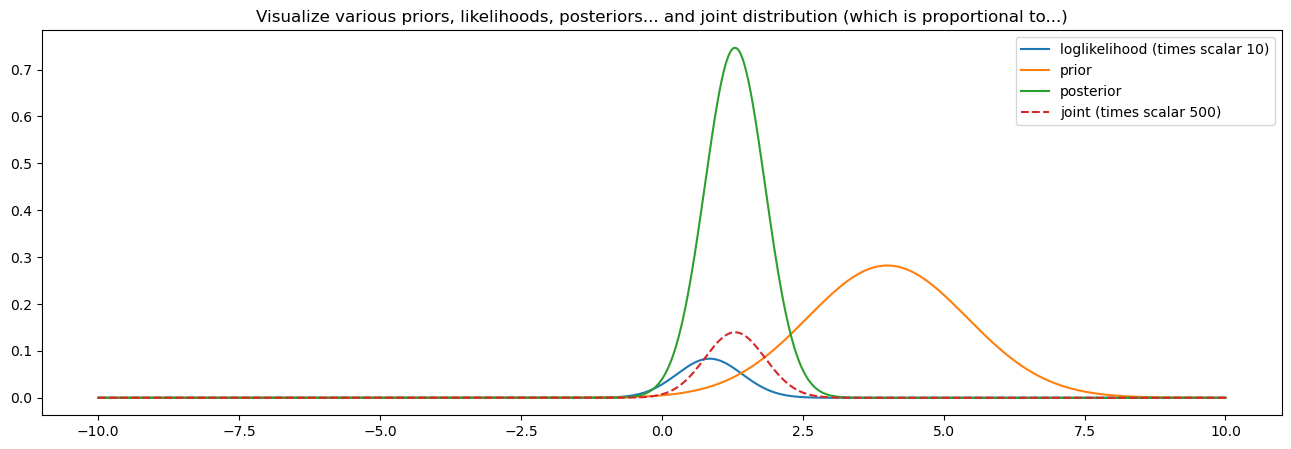

In [51]:
np.random.seed(5)

n = 3
x = stats.norm(loc=0,scale=1).rvs(n)
theta_0,tau = 4,1/2
parameter_domain = np.linspace(-10,10,1001)
likelihood = stats.norm.pdf((x[:,np.newaxis])*np.ones(parameter_domain.shape), 
                            loc=parameter_domain, scale=1).prod(axis=0) # sigma=1 known
prior = stats.norm(loc=theta_0, scale=1/tau**0.5).pdf(parameter_domain) # What if p(theta) = 1?
c,c2 = 500,10
joint = c*likelihood*prior # elementwise multiplication 
posterior = stats.norm(loc=(tau*theta_0+x.sum())/(tau+n), scale=1/(tau+n)**0.5).pdf(parameter_domain)
plt.figure(figsize=(16,5))
plt.plot(parameter_domain, c2*likelihood, label="loglikelihood (times scalar "+str(c2)+")")
plt.plot(parameter_domain, prior, label="prior"); plt.plot(parameter_domain, posterior, label="posterior")
plt.plot(parameter_domain, joint, linestyle="--", label="joint (times scalar "+str(c)+")")
plt.legend()
plt.title("Visualize various priors, likelihoods, posteriors... and joint distribution"); 

Classic Bayes Figure with Individual Likelihoods

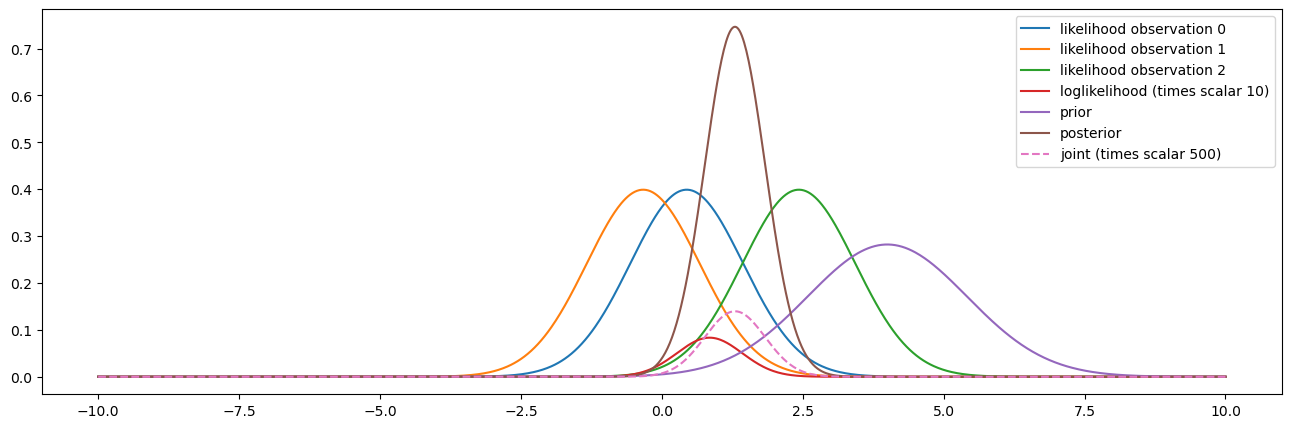

In [52]:
n = 3
c,c2 = 500,10
theta_0,tau = 4,1/2
parameter_domain = np.linspace(-10,10,1001)
plt.figure(figsize=(16,5))
prior = stats.norm(loc=theta_0, scale=1/tau**0.5).pdf(parameter_domain) # What if p(theta) = 1?
joint=prior
for xi in range(len(x)):
    likelihood = stats.norm.pdf(x[xi], 
                            loc=parameter_domain, scale=1)
    joint = likelihood*joint # elementwise multiplication
    plt.plot(parameter_domain, likelihood, label="likelihood observation "+ str(xi))
    
likelihood = stats.norm.pdf((x[:,np.newaxis])*np.ones(parameter_domain.shape), 
                            loc=parameter_domain, scale=1).prod(axis=0) # sigma=1 known

posterior = stats.norm(loc=(tau*theta_0+x.sum())/(tau+n), scale=1/(tau+n)**0.5).pdf(parameter_domain) 
joint=c*joint
plt.plot(parameter_domain, c2*likelihood, label="loglikelihood (times scalar "+str(c2)+")")
plt.plot(parameter_domain, prior, label="prior")
plt.plot(parameter_domain, posterior, label="posterior")
plt.plot(parameter_domain, joint, linestyle="--", label="joint (times scalar "+str(c)+")")
plt.legend()

Classic Bayes Figure with Log Scale

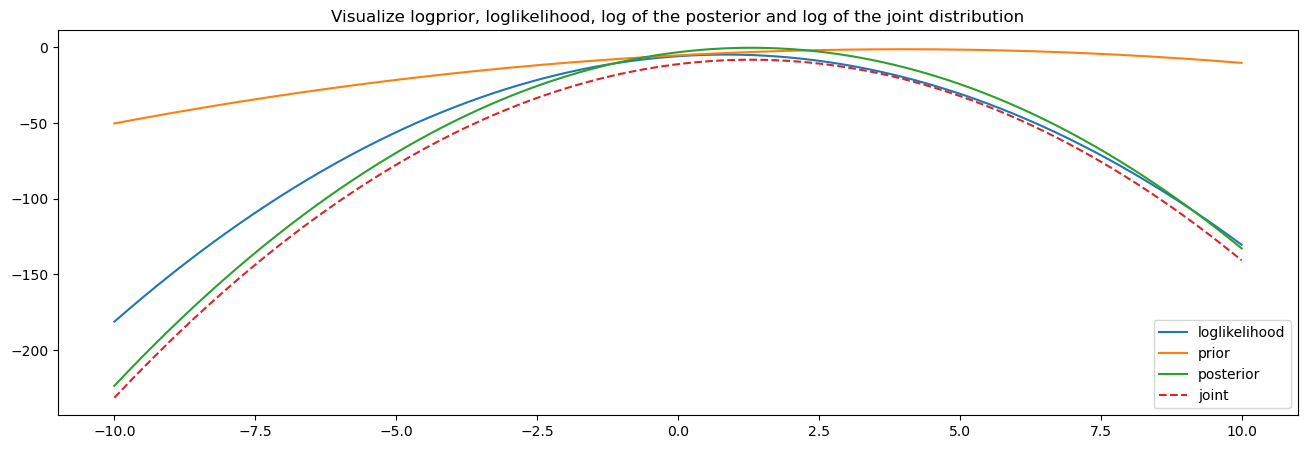

In [91]:
theta_0,tau = 4,1/2
parameter_domain = np.linspace(-10,10,1001)
likelihood=stats.norm.pdf((x[:,np.newaxis])*np.ones(parameter_domain.shape), 
                            loc=parameter_domain, scale=1).prod(axis=0) # sigma=1 known
loglikelihood = np.sum(stats.norm.logpdf((x[:,np.newaxis])*np.ones(parameter_domain.shape), 
                            loc=parameter_domain, scale=1), axis=0)
prior= stats.norm(loc=theta_0, scale=1/tau**0.5).pdf(parameter_domain) # What if p(theta) = 1?
logprior = stats.norm(loc=theta_0, scale=1/tau**0.5).logpdf(parameter_domain) # What if p(theta) = 1?
# c,c2 = 500,10


joint = loglikelihood+logprior # elementwise multiplication 
posterior = stats.norm(loc=(tau*theta_0+x.sum())/(tau+n), scale=1/(tau+n)**0.5).logpdf(parameter_domain)
plt.figure(figsize=(16,5))
plt.plot(parameter_domain, loglikelihood, label="loglikelihood")
plt.plot(parameter_domain, logprior, label="prior"); plt.plot(parameter_domain, posterior, label="posterior")
plt.plot(parameter_domain, joint, linestyle="--", label="joint")
plt.legend()
plt.title("Visualize logprior, loglikelihood, log of the posterior and log of the joint distribution"); 

3. What is the posterior distribution of a normal likelihood with 𝑝(𝜃)∝1?

The posterior distribution of a normal likelihood with p(𝜃)∝1 will be a normal distribution as well, since the posterior is proportional to the prior multiplied by the likelihood. Because the prior is flat, the posterior distribution will be proportional to the likelihood, which is a normal distribution.

4. How do log likelihoods and posteriors differ from each other as a result of improper priors and marginal likelihood constants?

Assuming we have an improper prior that is proportional to 1, and the likelihood is a normal distribution, the log likelihood and log posterior differ by the log of the marginal likelihood constant.